### 데이터   
- 10_소년범 연도별 재범자 수 및 재범 비중 추이_김현화_1: 소년재범자 수 
    - 사이트: https://kosis.kr/index/index.do
    - 통계표 이름: 소년범죄자 재범기간 및 종류
    - 일괄설정  
       - 항목: 전체  
       - 범죄별: 1, 2레벨 전체  
       - 재범기간및종류별: 1레벨 합계
       - 시점: 2006년~2019년    
    
- 10_소년범 연도별 재범자 수 및 재범 비중 추이_김현화_2: 소년범죄자 수
    - 사이트: https://kosis.kr/search/search.do
    - 통계표 이름: 범죄자 연령
    - 일괄설정  
       - 항목: 전체  
       - 범죄별: 전체  
       - 범행연령별: 소년
       - 시점: 2006년~2019년   
       
- 10_소년범 연도별 재범자 수 및 재범 비중 추이_3: 소년 재복역 인원
    - 사이트: https://www.crimestats.or.kr/portal/stat/easyStatPage.do
    - 통계표 이름: 「교정통계연보」DB 연령별 재복역 인원 현황
    - 일괄설정  
       - 항목: 전체  
       - 분류: 전체  
       - 검색기간: 2010년~2019년         

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('Data/10_소년범 연도별 재범자 수 및 재범 비중 추이_김현화_1.csv') 
df2 = pd.read_csv('Data/10_소년범 연도별 재범자 수 및 재범 비중 추이_김현화_2.csv') 
df3 = pd.read_csv('Data/10_소년범 연도별 재범자 수 및 재범 비중 추이_김현화_3.csv', thousands = ',') 

In [4]:
df1.head()

,범죄별(1),범죄별(2),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,소계,19981,25525,35397,36532,31191,30261,44319,41032,32265,30248,30368,28583,26905,26459
1,형법범,소계,14508,17705,24416,27856,24672,24275,36404,34028,26748,24867,24775,23127,22364,21911
2,형법범,재산범죄,8581,10016,12920,16199,15310,15013,21753,22391,16824,15555,15317,13338,13104,13236
3,형법범,강력범죄(흉악),704,692,1172,1385,1073,1237,1142,1047,1008,939,918,864,874,874
4,형법범,강력범죄(폭력),4881,6580,9593,9446,7454,7194,12002,9115,7547,6962,7054,7680,7175,6647


In [5]:
# '범죄별(1)' 컬럼 제거
df1 = df1.drop(['범죄별(1)'], axis=1).copy()
# 컬럼명 변경
df1.rename(columns={'범죄별(2)':'중분류'}, inplace=True)
# '중분류'를 인덱스로 설정
df1.set_index('중분류', inplace = True)
df1.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
중분류,,,,,,,,,,,,,,
소계,19981,25525,35397,36532,31191,30261,44319,41032,32265,30248,30368,28583,26905,26459
소계,14508,17705,24416,27856,24672,24275,36404,34028,26748,24867,24775,23127,22364,21911
재산범죄,8581,10016,12920,16199,15310,15013,21753,22391,16824,15555,15317,13338,13104,13236
강력범죄(흉악),704,692,1172,1385,1073,1237,1142,1047,1008,939,918,864,874,874
강력범죄(폭력),4881,6580,9593,9446,7454,7194,12002,9115,7547,6962,7054,7680,7175,6647


In [6]:
# 행렬 전치
df1_T = df1.T
df1_T.head()

중분류,소계,소계,재산범죄,강력범죄(흉악),강력범죄(폭력),위조범죄,공무원범죄,풍속범죄,과실범죄,기타형법범죄,...,출입국관리법,컴퓨터프로그램보호법,통신비밀보호법,특가법(도주차량),폐기물관리법,풍속영업의규제에관한법률,학원의설립운영및과외교습에관한법률,해양오염방지법,화물자동차운수사업법,기타특별법
2006,19981,14508,8581,704,4881,141,-,36,13,152,...,-,-,-,180,-,1,-,-,-,22
2007,25525,17705,10016,692,6580,184,-,9,9,215,...,-,-,-,203,-,-,-,-,-,131
2008,35397,24416,12920,1172,9593,370,-,24,18,319,...,-,3,-,268,-,-,-,-,-,478
2009,36532,27856,16199,1385,9446,498,-,37,21,270,...,-,8,-,202,-,-,-,-,-,322
2010,31191,24672,15310,1073,7454,512,-,21,23,279,...,-,-,-,160,-,-,-,-,-,279


In [7]:
# 컬럼명 출력
for col in df1_T.columns:
    print(col)

소계
소계
재산범죄
강력범죄(흉악)
강력범죄(폭력)
위조범죄
공무원범죄
풍속범죄
과실범죄
기타형법범죄
소계
개발제한구역의지정및관리에관한특별조치법
개인정보보호법
개항질서법
건설기계관리법
건축법
게임산업진흥에관한법률
경범죄처벌법
공유재산및물품관리법
공인중개사법
공중위생관리법
공직선거및선거부정방지법
공직선거법
관세법
교통사고처리특례법
국가보안법
국민체육진흥법
국토의계획및이용에관한법률
근로기준법
근로자퇴직급여보장법
노동조합및노동관계조정법
농수산물의원산지표시에관한법률
농지법
대기환경보전법
대부업등의등록및금융이용자보호에관한법률
도로교통법
도로교통법(무면허운전)
도로교통법(음주운전)
도로법
도시계획법
마약류관리에관한법률
물환경보전법
민사소송법
변호사법
병역법
부정경쟁방지및영업비밀보호에관한법률
부정수표단속법
사행행위등규제및처벌특례법
산림법
산림자원의조성및관리에관한법률
산업안전보건법
산지관리법
상표법
선박안전법
선박직원법
성매매법
성매매알선등행위의처벌에관한법률
소방기본법
수산업법
수산자원관리법
수질환경보전법
식품위생법
아동·청소년의성보호에관한법률
아동·청소년의성보호에관한법률(성매수등)
아동·청소년의성보호에관한법률(음란물등)
아동복지법
약사법
여객자동차운수사업법
여신전문금융업법
오수·분뇨및축산폐수의처리에관한법률
예비군법
옥외광고물등의관리와옥외광고산업진흥에관한법률
외국환거래법
유해화학물질관리법
윤락행위등방지법
음반·비디오물및게임물에관한법률
의료법
자동차관리법
자동차손해배상보장법
저작권법
전자금융거래법
정보통신망이용촉진및정보보호등에관한법률
조세범처벌법
조수보호및수렵에관한법률
주민등록법
주차장법
지방세법
직업안정법
집회및시위에관한법률
청소년보호법
청소년의성보호에관한법률
총포·도검·화약류등의안전관리에관한법률
축산물가공처리법
축산물위생관리법
출입국관리법
컴퓨터프로그램보호법
통신비밀보호법
특가법(도주차량)
폐기물관리법
풍속영업의규제에관한법률
학원의설립운영및과외교습에관한법률
해양오염방지법
화물자동차운수사업법
기타특별법


In [8]:
# 소계 컬럼만 추출
df1_T.iloc[:, [0, 1, 10]]

중분류,소계,소계,소계
2006,19981,14508,5473
2007,25525,17705,7820
2008,35397,24416,10981
2009,36532,27856,8676
2010,31191,24672,6519
2011,30261,24275,5986
2012,44319,36404,7915
2013,41032,34028,7004
2014,32265,26748,5517
2015,30248,24867,5381


In [9]:
type(df1_T.iloc[:, [0, 1, 10]])

pandas.core.frame.DataFrame

In [10]:
df1_T_sum = df1_T.iloc[:, [0, 1, 10]]
# 컬럼명 변경
df1_T_sum.columns = ['소년재범자 계', '소년재범자_형법범', '소년재범자_특별법범']
df1_T_sum

,소년재범자 계,소년재범자_형법범,소년재범자_특별법범
2006,19981,14508,5473
2007,25525,17705,7820
2008,35397,24416,10981
2009,36532,27856,8676
2010,31191,24672,6519
2011,30261,24275,5986
2012,44319,36404,7915
2013,41032,34028,7004
2014,32265,26748,5517
2015,30248,24867,5381


In [11]:
df2.head()

,범죄별(1),범죄별(2),범죄별(3),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,소계,소계,69211,88104,134992,113022,89776,83068,107490,91633,77594,71035,76000,72759,66142,66247
1,형법범,소계,소계,50846,60426,79766,81378,70045,66240,87779,74509,63145,56962,61162,58255,54205,54497
2,형법범,재산범죄,소계,29506,33659,39688,45774,40478,37978,47605,45735,36271,32068,33088,29056,26497,27809
3,형법범,재산범죄,절도,24842,28839,33073,38494,33534,31380,37256,33092,26047,21170,22534,20008,16904,17141
4,형법범,재산범죄,장물,222,271,571,820,722,454,1200,1498,830,801,591,443,290,175


In [12]:
# 연도별 소계만 리스트화
list(df2.iloc[0, 3:])

['69211',
 '88104',
 '134992',
 '113022',
 '89776',
 '83068',
 '107490',
 '91633',
 '77594',
 '71035',
 '76000',
 '72759',
 '66142',
 '66247']

In [13]:
# df1_T_sum에 리스트를 컬럼으로 삽입하기
# dataframe.insert(추가할 index, 추가할 컬럼의 이름, 추가할 컬럼의 값)
df1_T_sum.insert(1, '소년범죄자 계', list(df2.iloc[0, 3:]))
df1_T_sum

,소년재범자 계,소년범죄자 계,소년재범자_형법범,소년재범자_특별법범
2006,19981,69211,14508,5473
2007,25525,88104,17705,7820
2008,35397,134992,24416,10981
2009,36532,113022,27856,8676
2010,31191,89776,24672,6519
2011,30261,83068,24275,5986
2012,44319,107490,36404,7915
2013,41032,91633,34028,7004
2014,32265,77594,26748,5517
2015,30248,71035,24867,5381


In [14]:
# 소년재범자 계, 소년범죄자 계 컬럼만 가져오기
df_re = df1_T_sum[['소년재범자 계', '소년범죄자 계']].copy()

In [15]:
# 데이터 타입 숫자로 변경 df=df.apply(pd.to_numeric)
df_re = df_re.apply(pd.to_numeric)

In [16]:
# 컬럼끼리 연산하여 재범 비중 컬럼 추가
# x는 df_re를 입력변수(매개변수)로 받음, axis = 1은 열 방향으로 칼럼의 연산을 적용하라는 의미 
df_re['재범 비중'] = df_re.apply(lambda x: x['소년재범자 계']/x['소년범죄자 계']*100, axis=1).round(1).copy()
df_re

,소년재범자 계,소년범죄자 계,재범 비중
2006,19981,69211,28.9
2007,25525,88104,29.0
2008,35397,134992,26.2
2009,36532,113022,32.3
2010,31191,89776,34.7
2011,30261,83068,36.4
2012,44319,107490,41.2
2013,41032,91633,44.8
2014,32265,77594,41.6
2015,30248,71035,42.6


### 시각화하기

In [17]:
# 폰트 크기 설정
plt.rcParams["font.size"] = 13

### 1. 소년범 연도별 재범자 수와 재범 비중 추이 (2006~2019년)

In [18]:
# 소년 재범자 수

In [19]:
gr1 = df_re['소년재범자 계']

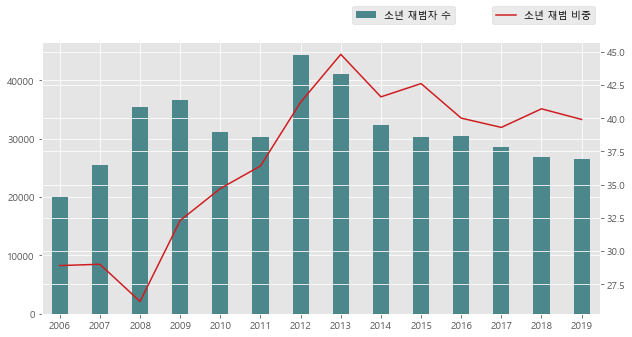

In [20]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr1 = df_re['소년재범자 계']
gr2 = df_re['재범 비중']
gr1.plot(kind='bar', ax=ax1, color='#4B878BFF', label='소년 재범자 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='#D01C1FFF', label='소년 재범 비중')
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)


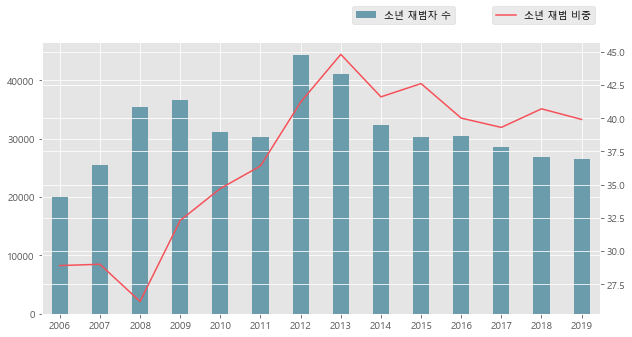

In [21]:
# 색상 변경
plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

gr1 = df_re['소년재범자 계']
gr2 = df_re['재범 비중']
gr1.plot(kind='bar', ax=ax1, color='#6A9CAC', label='소년 재범자 수', rot=0, figsize=(10, 5), width=0.4) # Navy
gr2.plot(kind='line', ax=ax2, color='#F65058FF', label='소년 재범 비중') # Red
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

In [22]:
# matplotlib style 한글 깨짐 -> matplotlib fontlist ~~ .json파일 업데이트
#mp.font_manager._rebuild()

소년범 재범 비중은 2008년 26.2%에서 2013년 44.8%로 크게 증가하였으나, 2013년 이후 완만히 감소하는 추세를 보인다.

2. 자료별 재범 비중 추이

(1) kosis 범죄자 남녀 및 성인·소년별 전과 기준

In [23]:
# 데이터 불러오기
df = pd.read_csv('./Data/11_성인 대비 소년 재범률 비교_2.csv', encoding='cp949') 
df.fillna(0, inplace=True)


# 재범합계와 초범합계만 추출
df_result = pd.concat([df[2:3], df[3:4]]) # , df[13:14] : 초범
# 컬럼 정리
df_result = df_result.drop(columns=['전과별(1)', '전과별(2)'])
# 숫자형으로 변경
df_result = df_result.astype(int)
df_result

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,69012,87798,134340,112685,89580,102162,107452,91573,77567,71034,76000,72754,66135,66243
3,19975,25522,35399,36571,31521,37238,40200,38039,29652,27055,26260,24040,22308,21457


In [24]:
# 행렬 전치
df_result_T = df_result.T
df_result_T

,2,3
2006,69012,19975
2007,87798,25522
2008,134340,35399
2009,112685,36571
2010,89580,31521
2011,102162,37238
2012,107452,40200
2013,91573,38039
2014,77567,29652
2015,71034,27055


In [25]:
# 컬럼명 바꾸기
df_result_T.columns = ['소년범죄자 계(2)', '소년재범자 계(2)']

# 재범 비중 컬럼 추가
df_result_T['재범 비중(2)'] = df_result_T.apply(lambda x: x['소년재범자 계(2)']/x['소년범죄자 계(2)']*100, axis=1).round(1).copy()
df_result_T

,소년범죄자 계(2),소년재범자 계(2),재범 비중(2)
2006,69012,19975,28.9
2007,87798,25522,29.1
2008,134340,35399,26.4
2009,112685,36571,32.5
2010,89580,31521,35.2
2011,102162,37238,36.4
2012,107452,40200,37.4
2013,91573,38039,41.5
2014,77567,29652,38.2
2015,71034,27055,38.1


(2) kosis 소년범죄자 재범기간 및 종류 기준

In [26]:
df_re

,소년재범자 계,소년범죄자 계,재범 비중
2006,19981,69211,28.9
2007,25525,88104,29.0
2008,35397,134992,26.2
2009,36532,113022,32.3
2010,31191,89776,34.7
2011,30261,83068,36.4
2012,44319,107490,41.2
2013,41032,91633,44.8
2014,32265,77594,41.6
2015,30248,71035,42.6


In [27]:
# 자료별 데이터프레임 합치기
df_join = df_re.join(df_result_T, how='left') 
df_join

,소년재범자 계,소년범죄자 계,재범 비중,소년범죄자 계(2),소년재범자 계(2),재범 비중(2)
2006,19981,69211,28.9,69012,19975,28.9
2007,25525,88104,29.0,87798,25522,29.1
2008,35397,134992,26.2,134340,35399,26.4
2009,36532,113022,32.3,112685,36571,32.5
2010,31191,89776,34.7,89580,31521,35.2
2011,30261,83068,36.4,102162,37238,36.4
2012,44319,107490,41.2,107452,40200,37.4
2013,41032,91633,44.8,91573,38039,41.5
2014,32265,77594,41.6,77567,29652,38.2
2015,30248,71035,42.6,71034,27055,38.1


In [28]:
# 컬럼 순서 변경
df_join = df_join[['소년재범자 계', '소년범죄자 계', '재범 비중', '소년재범자 계(2)', '소년범죄자 계(2)', '재범 비중(2)']]
# 컬럼명 변경
df_join.rename(columns={'소년재범자 계':'소년재범자 계(1)','소년범죄자 계':'소년범죄자 계(1)', '재범 비중':'재범 비중(1)' }, inplace=True)
df_join

,소년재범자 계(1),소년범죄자 계(1),재범 비중(1),소년재범자 계(2),소년범죄자 계(2),재범 비중(2)
2006,19981,69211,28.9,19975,69012,28.9
2007,25525,88104,29.0,25522,87798,29.1
2008,35397,134992,26.2,35399,134340,26.4
2009,36532,113022,32.3,36571,112685,32.5
2010,31191,89776,34.7,31521,89580,35.2
2011,30261,83068,36.4,37238,102162,36.4
2012,44319,107490,41.2,40200,107452,37.4
2013,41032,91633,44.8,38039,91573,41.5
2014,32265,77594,41.6,29652,77567,38.2
2015,30248,71035,42.6,27055,71034,38.1


In [29]:
# 차이 컬럼 추가

df_join['차이: (1)-(2)'] = df_join.apply(lambda x: x['소년재범자 계(1)'] - x['소년재범자 계(2)'], axis=1).round(1).copy()
df_join

,소년재범자 계(1),소년범죄자 계(1),재범 비중(1),소년재범자 계(2),소년범죄자 계(2),재범 비중(2),차이: (1)-(2)
2006,19981,69211,28.9,19975,69012,28.9,6.0
2007,25525,88104,29.0,25522,87798,29.1,3.0
2008,35397,134992,26.2,35399,134340,26.4,-2.0
2009,36532,113022,32.3,36571,112685,32.5,-39.0
2010,31191,89776,34.7,31521,89580,35.2,-330.0
2011,30261,83068,36.4,37238,102162,36.4,-6977.0
2012,44319,107490,41.2,40200,107452,37.4,4119.0
2013,41032,91633,44.8,38039,91573,41.5,2993.0
2014,32265,77594,41.6,29652,77567,38.2,2613.0
2015,30248,71035,42.6,27055,71034,38.1,3193.0


In [30]:
# 소년재범자 계(1), 소년재범자 계(2), 차이(1)-(2) 컬럼 추출
# df3_rate_under20 = df3_rate.loc[:, ['연도', '20세 미만']].copy()
df_discrepancy = df_join.loc[:, ['소년재범자 계(1)', '소년재범자 계(2)', '차이: (1)-(2)']]
df_discrepancy

,소년재범자 계(1),소년재범자 계(2),차이: (1)-(2)
2006,19981,19975,6.0
2007,25525,25522,3.0
2008,35397,35399,-2.0
2009,36532,36571,-39.0
2010,31191,31521,-330.0
2011,30261,37238,-6977.0
2012,44319,40200,4119.0
2013,41032,38039,2993.0
2014,32265,29652,2613.0
2015,30248,27055,3193.0


- 소년재범자 계(1): '범죄분석통계:소년범죄자 재범기간 및 종류'에서 연도별 합계
- 소년재범자 계(2): '범죄분석통계:범죄자 남녀 및 성인・소년별 전과'에서 전과별: 전과있음, 범행연령별: 소년의 연도별 합계  

(3) 자료별 재범자 비중 비교

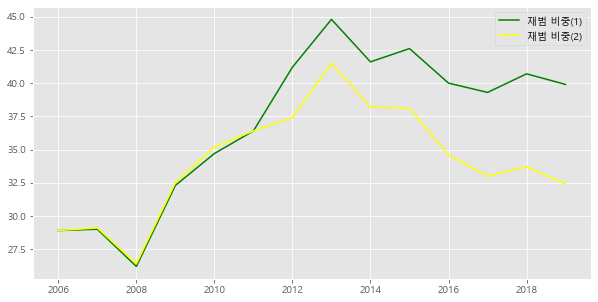

In [31]:
plt.style.use('ggplot')

gr3 = df_join['재범 비중(1)']
gr4 = df_join['재범 비중(2)']

gr3.plot(kind='line', color='green', rot=0, figsize=(10, 5)) 
gr4.plot(kind='line', color='yellow') 

plt.legend()

### (1)과 (2)의 수치가 불일치하는 이유
- 통계 설명자료 -> 이용자용 통계정보보고서_범죄분석통계2019.pdf 9페이지  
재범은 본건 직전 범죄행위에 대해 수사 또는 재판이 진행 중이거나 구류형, 과료형, 보호처분, 기소유예(선도조건부 기소유예 포함), 공소보류, 기소중지 처분된 경우도 모두 포함됨. 따라서 전과자 수와 재범자 수는 일치하지 않음

- 참고: 소년 시절 방황에도 군인공무원 기회 준다  
https://www.moj.go.kr/bbs/moj/182/545736/artclView.do  

#### 전과가 아닌 유죄 기준으로 초범과 재범을 분류하기 때문에,  '범죄분석통계:소년범죄자 재범기간 및 종류'의 자료를 기준으로 삼아야 함 



### 2. 20세 미만 재범률 추이 (2010~2019년)

In [32]:
df3.head()

,자료시점,분류,계,20세 미만,20~29세,30~39세,40~49세,50~59세,60세 이상
0,2019년,출소인원,24356.0,153.0,3506.0,5164.0,7060.0,6257.0,2216.0
1,2019년,재복역인원,6486.0,70.0,1051.0,1410.0,1954.0,1588.0,413.0
2,2019년,재복역인원(%),26.6,45.8,30.0,27.3,27.7,25.4,18.6
3,2018년,출소인원,22484.0,187.0,3264.0,4963.0,6734.0,5581.0,1755.0
4,2018년,재복역인원,5780.0,79.0,935.0,1344.0,1812.0,1329.0,281.0


In [33]:
# '분류'에서 '(%)'가 있는 행만 추출
df3_rate = df3[df3.분류.str.contains('(%)')]
df3_rate

D:\mydeven\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,자료시점,분류,계,20세 미만,20~29세,30~39세,40~49세,50~59세,60세 이상
2,2019년,재복역인원(%),26.6,45.8,30.0,27.3,27.7,25.4,18.6
5,2018년,재복역인원(%),25.7,42.2,28.6,27.1,26.9,23.8,16.0
8,2017년,재복역인원(%),24.7,35.2,28.3,25.2,26.8,22.6,14.0
11,2016년,재복역인원(%),24.8,49.1,26.1,27.4,26.1,21.3,14.5
14,2015년,재복역인원(%),21.4,35.1,24.1,23.7,21.7,17.9,13.7
17,2014년,재복역인원(%),22.1,37.2,26.3,24.8,21.6,17.9,12.5
20,2013년,재복역인원(%),22.2,38.2,27.0,24.4,21.8,16.9,10.9
23,2012년,재복역인원(%),22.2,41.1,26.9,24.3,21.5,17.3,11.8
26,2011년,재복역인원(%),22.3,39.7,25.6,24.9,21.2,16.9,12.6
29,2010년,재복역인원(%),22.5,41.7,24.8,24.8,21.4,17.7,14.0


In [34]:
# 컬럼명 변경
df3_rate.rename(columns={'자료시점':'연도'}, inplace=True)
# '연도', '20세 미만' 컬럼만 추출
df3_rate_under20 = df3_rate.loc[:, ['연도', '20세 미만']].copy()
# '연도'를 인덱스로 설정
df3_rate_under20.set_index('연도', inplace = True)
df3_rate_under20

D:\mydeven\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,20세 미만
연도,
2019년,45.8
2018년,42.2
2017년,35.2
2016년,49.1
2015년,35.1
2014년,37.2
2013년,38.2
2012년,41.1
2011년,39.7


In [35]:
# 연도 기준 내림차순 정렬 
df3_rate_under20 = df3_rate_under20.sort_values('연도').copy()
df3_rate_under20 

,20세 미만
연도,
2010년,41.7
2011년,39.7
2012년,41.1
2013년,38.2
2014년,37.2
2015년,35.1
2016년,49.1
2017년,35.2
2018년,42.2


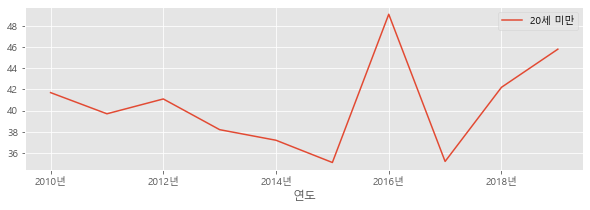

In [36]:
# 선 그래프
df3_rate_under20.plot(kind='line', rot=0, figsize=(10, 3))
plt.show()

20세 미만 재범률은 2010년부터 감소 추세를 보이다가, 2016년 눈에 띄게 치솟음  
2017년에는 2015년 수준을 회복하였으나, 이후 큰 폭으로 증가하고 있음

### 3. 연령별 재범률 추이 (2010~2019년)

In [37]:
df3_rate

,연도,분류,계,20세 미만,20~29세,30~39세,40~49세,50~59세,60세 이상
2,2019년,재복역인원(%),26.6,45.8,30.0,27.3,27.7,25.4,18.6
5,2018년,재복역인원(%),25.7,42.2,28.6,27.1,26.9,23.8,16.0
8,2017년,재복역인원(%),24.7,35.2,28.3,25.2,26.8,22.6,14.0
11,2016년,재복역인원(%),24.8,49.1,26.1,27.4,26.1,21.3,14.5
14,2015년,재복역인원(%),21.4,35.1,24.1,23.7,21.7,17.9,13.7
17,2014년,재복역인원(%),22.1,37.2,26.3,24.8,21.6,17.9,12.5
20,2013년,재복역인원(%),22.2,38.2,27.0,24.4,21.8,16.9,10.9
23,2012년,재복역인원(%),22.2,41.1,26.9,24.3,21.5,17.3,11.8
26,2011년,재복역인원(%),22.3,39.7,25.6,24.9,21.2,16.9,12.6
29,2010년,재복역인원(%),22.5,41.7,24.8,24.8,21.4,17.7,14.0


In [38]:
# 분류, 계 컬럼 제거
df3_rate = df3_rate.drop(['분류', '계'], axis=1).copy()
# 연도 기준 내림차순 정렬 
df3_rate = df3_rate.sort_values('연도').copy()
# 연도를 인덱스로 설정
df3_rate.set_index('연도', inplace = True)
df3_rate

,20세 미만,20~29세,30~39세,40~49세,50~59세,60세 이상
연도,,,,,,
2010년,41.7,24.8,24.8,21.4,17.7,14.0
2011년,39.7,25.6,24.9,21.2,16.9,12.6
2012년,41.1,26.9,24.3,21.5,17.3,11.8
2013년,38.2,27.0,24.4,21.8,16.9,10.9
2014년,37.2,26.3,24.8,21.6,17.9,12.5
2015년,35.1,24.1,23.7,21.7,17.9,13.7
2016년,49.1,26.1,27.4,26.1,21.3,14.5
2017년,35.2,28.3,25.2,26.8,22.6,14.0
2018년,42.2,28.6,27.1,26.9,23.8,16.0


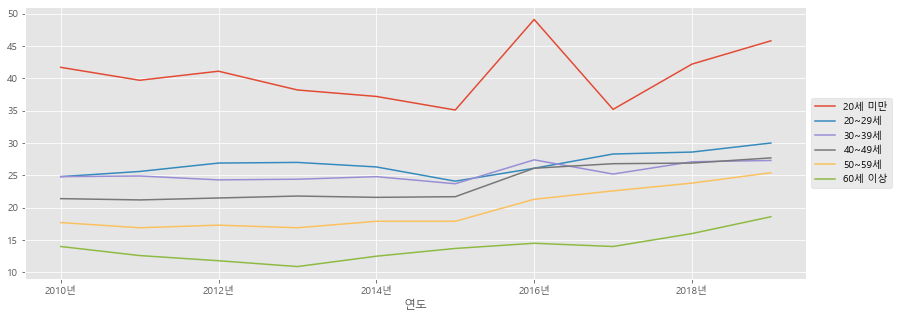

In [39]:
# 선 그래프
df3_rate.plot(kind='line', rot=0, figsize=(14, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # 범주 박스 위치 조절
plt.show()

다른 연령대에 비해 20세 미만 재범률이 현저히 높은 것을 알 수 있음
